# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD3100 - Ciencia de Datos Geoespaciales
**Pontificia Universidad Católica de Chile**<br>
**Magister en Ciencia de Datos**<br>

## 1.Leer un DEM (ahora con `rioxarray`).

En este ejemplo, utilizaremos `rioxarray` para leer, visualizar y manipular datos raster.<br>

Para aprender sobre las características y ventajas de `xarray`, revisar la siguiente documentación:

https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html


In [1]:
import rioxarray as rxr
dem = rxr.open_rasterio('s34_w072_1arc_v3.tif')
dem

<xarray.DataArray (band: 1, y: 3601, x: 3601)> Size: 26MB
[12967201 values with dtype=int16]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 29kB -33.0 -33.0 -33.0 -33.0 ... -34.0 -34.0 -34.0
  * x            (x) float64 29kB -72.0 -72.0 -72.0 -72.0 ... -71.0 -71.0 -71.0
    spatial_ref  int64 8B 0
Attributes: (12/27)
    DTED_CompilationDate:         2
    DTED_DataEdition:             2
    DTED_DigitizingSystem:        SRTM      
    DTED_HorizontalAccuracy:      9
    DTED_HorizontalDatum:         WGS84
    DTED_MaintenanceDate:         0
    ...                           ...
    DTED_VerticalDatum:           E96
    AREA_OR_POINT:                Point
    _FillValue:                   -32767
    scale_factor:                 1.0
    add_offset:                   0.0
    units:                        m

In [3]:
#La matriz de datos:
dem.data

array([[[   0,    0,    0, ..., 1167, 1164, 1162],
        [   0,    0,    0, ..., 1169, 1164, 1160],
        [   0,    0,    0, ..., 1170, 1163, 1158],
        ...,
        [   0,    0,    0, ...,  647,  661,  664],
        [   0,    0,    0, ...,  644,  650,  655],
        [   0,    0,    0, ...,  637,  641,  645]]],
      shape=(1, 3601, 3601), dtype=int16)

In [4]:
# View the Coordinate Reference System (CRS) & spatial extent
print("The CRS for this data is:", dem.rio.crs)
print("The spatial extent is:", dem.rio.bounds())

The CRS for this data is: EPSG:4326
The spatial extent is: (-72.00013888888888, -34.0001388888889, -70.99986111111112, -32.999861111111116)


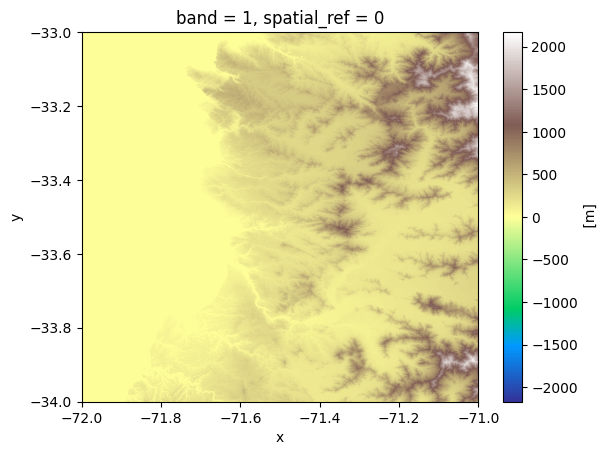

In [5]:
dem.plot(cmap='terrain')

## 2. Sampleo con `xarray`

In [6]:
import random
import numpy as np

#puntos aleatorios
x=random.choices(np.arange(-72,-71,0.01), k=10)
y=random.choices(np.arange(-34,-33,0.01), k=10)


In [7]:
da = dem.sel(x=x, y=y, method="nearest")
da

<xarray.DataArray (band: 1, y: 10, x: 10)> Size: 200B
array([[[ 127,    0,  406,  118,  321,  743,  535,  535,   74,   63],
        [ 236,    0,  242,  289,  444,  217,  870,  870,    0,   84],
        [   0,    0,  139,  166,  159,  116, 1133, 1133,    0,    0],
        [ 140,    0,  477,  102,  617,  446,  327,  327,   58,  149],
        [ 125,    0,  175,  190,  179,  203,  269,  269,    0,  170],
        [ 177,    0,  161,  154,  320,  381, 1284, 1284,   88,   53],
        [ 499,    0,  796,  498,  463,  898, 1029, 1029,    0,  564],
        [ 204,    0,  150,  215,  451,  166, 1271, 1271,   89,  251],
        [ 285,    0,  894,  334,  806,  515,  956,  956,    0,  291],
        [  10,    0,  190,  184,  179,  156,  237,  237,    0,   53]]],
      dtype=int16)
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 80B -33.84 -33.06 -33.02 ... -33.88 -33.29 -33.6
  * x            (x) float64 80B -71.62 -71.96 -71.21 ... -71.03 -71.73 -71.6
    spatial_ref  int64 8B 0
Attributes: (12/27)
    DTED_CompilationDate:         2
    DTED_DataEdition:             2
    DTED_DigitizingSystem:        SRTM      
    DTED_HorizontalAccuracy:      9
    DTED_HorizontalDatum:         WGS84
    DTED_MaintenanceDate:         0
    ...                           ...
    DTED_VerticalDatum:           E96
    AREA_OR_POINT:                Point
    _FillValue:                   -32767
    scale_factor:                 1.0
    add_offset:                   0.0
    units:                        m

## 3. Reproyección.

In [8]:
import numpy as np
nodata=-9999
dem_utm = dem.rio.reproject(32719,nodata=nodata)
dem_utm

<xarray.DataArray (band: 1, y: 3981, x: 3363)> Size: 27MB
array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]]],
      shape=(1, 3981, 3363), dtype=int16)
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 32kB 6.347e+06 6.347e+06 ... 6.234e+06 6.234e+06
  * x            (x) float64 27kB 2.197e+05 2.197e+05 ... 3.152e+05 3.153e+05
    spatial_ref  int64 8B 0
Attributes: (12/27)
    DTED_CompilationDate:         2
    DTED_DataEdition:             2
    DTED_DigitizingSystem:        SRTM      
    DTED_HorizontalAccuracy:      9
    DTED_HorizontalDatum:         WGS84
    DTED_MaintenanceDate:         0
    ...                           ...
    DTED_VerticalDatum:           E96
    AREA_OR_POINT:                Point
    scale_factor:                 1.0
    add_offset:                   0.0
    units:                        m
    _FillValue:                   -32767

In [9]:
dem_utm = dem_utm.where(dem_utm != nodata)


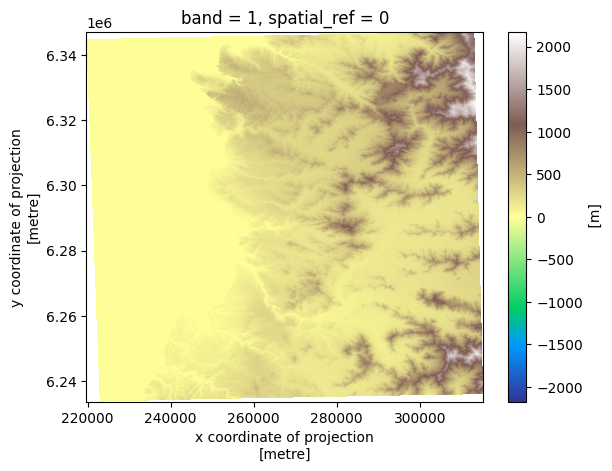

In [10]:
dem_utm.plot(cmap='terrain');#vmin=0

## 4. Estadísticas zonales.

Además de evaluar un raster en putos específicos, también es usual que nos interese calcular estadísticas sobre una región o geometría específica. Por ejemplo, para nuestro DEM de ejemplo, podemos calculas las elevaciones mínimas, media y máxima para una o varias comunas.
La geometría de las comunas de la Región de Valparaíso está dada por la cartografía censal que hemos utilizado en actividades anteriores.

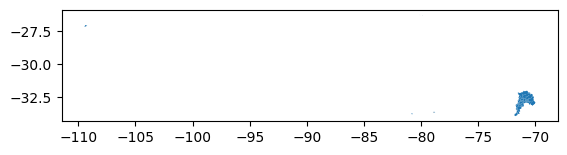

In [11]:
import geopandas as gpd
comuna=gpd.read_file('Comunal.shp')
comuna.plot();

In [13]:
comuna.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
dem.rio.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

<Axes: >

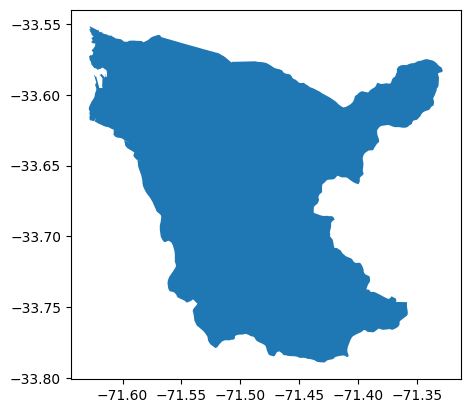

In [16]:
com=comuna[comuna['N_COMUNA']=='SAN ANTONIO']
com.plot()

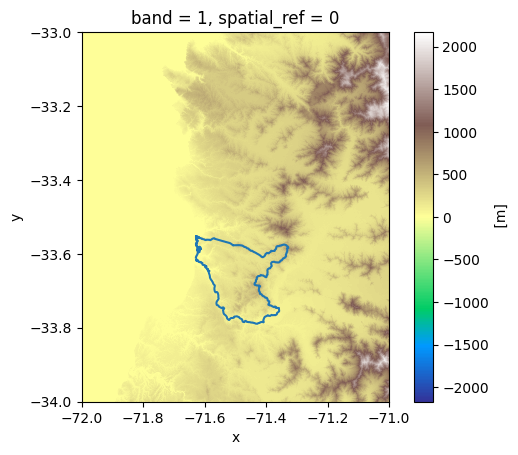

In [17]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)

dem.plot(cmap='terrain',ax=ax);
com.boundary.plot(ax=ax);

In [18]:
dem_clip=dem.rio.clip(com.to_crs(4326).geometry)
dem_clip

<xarray.DataArray (band: 1, y: 854, x: 1082)> Size: 2MB
array([[[-32767, -32767, -32767, ..., -32767, -32767, -32767],
        [-32767, -32767, -32767, ..., -32767, -32767, -32767],
        [-32767, -32767,      5, ..., -32767, -32767, -32767],
        ...,
        [-32767, -32767, -32767, ..., -32767, -32767, -32767],
        [-32767, -32767, -32767, ..., -32767, -32767, -32767],
        [-32767, -32767, -32767, ..., -32767, -32767, -32767]]],
      shape=(1, 854, 1082), dtype=int16)
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 7kB -33.55 -33.55 -33.55 ... -33.79 -33.79 -33.79
  * x            (x) float64 9kB -71.63 -71.63 -71.63 ... -71.33 -71.33 -71.33
    spatial_ref  int64 8B 0
Attributes: (12/27)
    DTED_CompilationDate:         2
    DTED_DataEdition:             2
    DTED_DigitizingSystem:        SRTM      
    DTED_HorizontalAccuracy:      9
    DTED_HorizontalDatum:         WGS84
    DTED_MaintenanceDate:         0
    ...                           ...
    DTED_VerticalDatum:           E96
    AREA_OR_POINT:                Point
    scale_factor:                 1.0
    add_offset:                   0.0
    units:                        m
    _FillValue:                   -32767

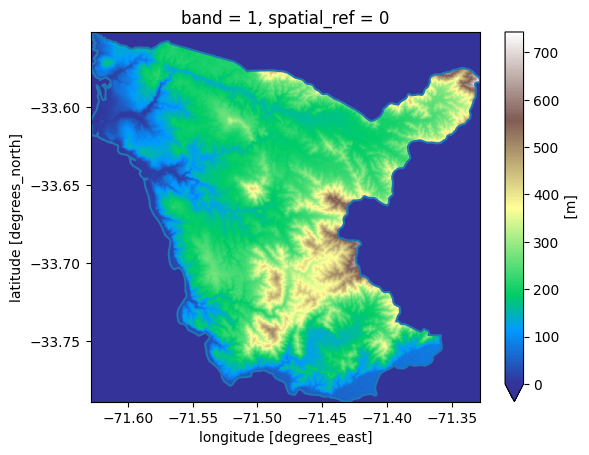

In [19]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)

dem_clip.plot(cmap='terrain',ax=ax,vmin=0);
com.boundary.plot(ax=ax);

In [20]:
dem_clip

<xarray.DataArray (band: 1, y: 854, x: 1082)> Size: 2MB
array([[[-32767, -32767, -32767, ..., -32767, -32767, -32767],
        [-32767, -32767, -32767, ..., -32767, -32767, -32767],
        [-32767, -32767,      5, ..., -32767, -32767, -32767],
        ...,
        [-32767, -32767, -32767, ..., -32767, -32767, -32767],
        [-32767, -32767, -32767, ..., -32767, -32767, -32767],
        [-32767, -32767, -32767, ..., -32767, -32767, -32767]]],
      shape=(1, 854, 1082), dtype=int16)
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 7kB -33.55 -33.55 -33.55 ... -33.79 -33.79 -33.79
  * x            (x) float64 9kB -71.63 -71.63 -71.63 ... -71.33 -71.33 -71.33
    spatial_ref  int64 8B 0
Attributes: (12/27)
    DTED_CompilationDate:         2
    DTED_DataEdition:             2
    DTED_DigitizingSystem:        SRTM      
    DTED_HorizontalAccuracy:      9
    DTED_HorizontalDatum:         WGS84
    DTED_MaintenanceDate:         0
    ...                           ...
    DTED_VerticalDatum:           E96
    AREA_OR_POINT:                Point
    scale_factor:                 1.0
    add_offset:                   0.0
    units:                        m
    _FillValue:                   -32767

In [21]:
dem_clip = dem_clip.where(dem_clip != -32767)
dem_clip

<xarray.DataArray (band: 1, y: 854, x: 1082)> Size: 4MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan,  5., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]],
      shape=(1, 854, 1082), dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 7kB -33.55 -33.55 -33.55 ... -33.79 -33.79 -33.79
  * x            (x) float64 9kB -71.63 -71.63 -71.63 ... -71.33 -71.33 -71.33
    spatial_ref  int64 8B 0
Attributes: (12/27)
    DTED_CompilationDate:         2
    DTED_DataEdition:             2
    DTED_DigitizingSystem:        SRTM      
    DTED_HorizontalAccuracy:      9
    DTED_HorizontalDatum:         WGS84
    DTED_MaintenanceDate:         0
    ...                           ...
    DTED_VerticalDatum:           E96
    AREA_OR_POINT:                Point
    scale_factor:                 1.0
    add_offset:                   0.0
    units:                        m
    _FillValue:                   -32767

In [23]:
dem_clip.min().values,dem_clip.max().values, dem_clip.mean().values

(array(-14., dtype=float32),
 array(743., dtype=float32),
 array(212.93494, dtype=float32))

## 5. Estadísticas zonales para un conjunto de polígonos

Si queremos repetir el cáluclo de esta´disticas zonales para un conjunto de geometrías, puede ser conveniente usar la función `zonal_stats` de la librería `rasterstats`: https://pythonhosted.org/rasterstats/

In [24]:
from rasterstats import zonal_stats

zs=zonal_stats('Comunal.shp','s34_w072_1arc_v3.tif')
zs

[{'min': -1.0, 'max': 530.0, 'mean': 214.82200143101684, 'count': 110411},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'min': -14.0, 'max': 743.0, 'mean': 212.93492842226084, 'count': 501832},
 {'min': 0.0, 'max': 587

Convertimos los resultados en un DataFrame y combinamos con el GeoDataFrame de comunas para ordenar los resultados:

In [26]:
import pandas as pd
zs=pd.DataFrame(zs)
zs

,min,max,mean,count
0,-1.0,530.0,214.822001,110411
1,NaN,NaN,NaN,0
2,NaN,NaN,NaN,0
3,NaN,NaN,NaN,0
4,NaN,NaN,NaN,0
5,NaN,NaN,NaN,0
6,NaN,NaN,NaN,0
7,NaN,NaN,NaN,0
8,NaN,NaN,NaN,0
9,NaN,NaN,NaN,0


In [30]:
com_zs=comuna.join(zs)
com_zs

,CUT,N_REGION,N_PROVINCI,N_COMUNA,SHAPE_Leng,SHAPE_Area,geometry,min,max,mean,count
0,5109,VALPARAÍSO,VALPARAÍSO,VIÑA DEL MAR,0.634746,0.011631,"POLYGON ((-71.54618 -32.94563, -71.54605 -32.9...",-1.0,530.0,214.822001,110411
1,5201,VALPARAÍSO,ISLA DE PASCUA,ISLA DE PASCUA,0.863063,0.014938,"MULTIPOLYGON (((-109.45252 -27.20022, -109.452...",NaN,NaN,NaN,0
2,5301,VALPARAÍSO,LOS ANDES,LOS ANDES,2.277432,0.118964,"POLYGON ((-70.14755 -32.72807, -70.14722 -32.7...",NaN,NaN,NaN,0
3,5302,VALPARAÍSO,LOS ANDES,CALLE LARGA,0.990187,0.031069,"POLYGON ((-70.64668 -32.82893, -70.6464 -32.82...",NaN,NaN,NaN,0
4,5303,VALPARAÍSO,LOS ANDES,RINCONADA,0.572892,0.011860,"POLYGON ((-70.71163 -32.7878, -70.71166 -32.78...",NaN,NaN,NaN,0
5,5304,VALPARAÍSO,LOS ANDES,SAN ESTEBAN,1.833496,0.132199,"POLYGON ((-70.21761 -32.42966, -70.21659 -32.4...",NaN,NaN,NaN,0
6,5401,VALPARAÍSO,PETORCA,LA LIGUA,2.177743,0.111527,"POLYGON ((-71.21786 -32.12928, -71.21719 -32.1...",NaN,NaN,NaN,0
7,5402,VALPARAÍSO,PETORCA,CABILDO,2.530927,0.139610,"POLYGON ((-70.45247 -32.22407, -70.45247 -32.2...",NaN,NaN,NaN,0
8,5403,VALPARAÍSO,PETORCA,PAPUDO,0.708719,0.015976,"MULTIPOLYGON (((-71.43286 -32.47673, -71.43286...",NaN,NaN,NaN,0
9,5404,VALPARAÍSO,PETORCA,PETORCA,2.181292,0.145033,"POLYGON ((-70.69736 -32.03996, -70.69676 -32.0...",NaN,NaN,NaN,0


(-34.0, -32.8)

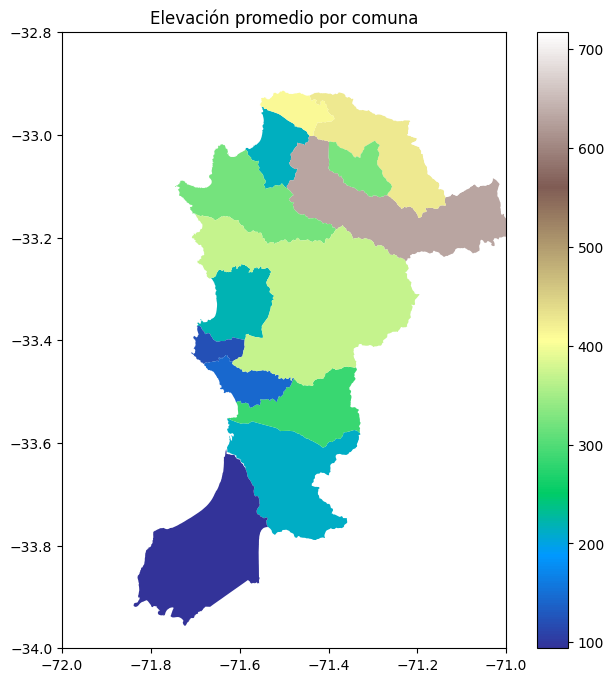

In [31]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
com_zs.plot(column='mean',cmap='terrain',ax=ax,legend=True)
ax.set_title('Elevación promedio por comuna')
ax.set_xlim(-72,-71)
ax.set_ylim(-34,-32.8)
